# Pytest Fixture
## 装饰器@pytest.fixture()
@pytest.fixture()用于声明一个函数是fixture。如果测试函数的参数列表中包含fixture名，那么pytest会检测到，并在测试函数运行之前执行该fixture。fixture可以完成任务，也可以返回数据给测试函数。

## 通过conftest.py共享fixture

confest.py被pytest视作一个本地插件库（参考第五章），可以把tests/conftest.py看成一个供tests目录下所有测试使用的fixture仓库。

## 使用fixture执行配置及销毁逻辑
tmpdir是pytest提供的fixture，供测试使用。（第四章介绍），提供一个临时目录。

## 使用--setup-show回溯fixture的执行过程
pytest --setup-show .\test_add.py -k valid_id

## 使用fixture传递测试数据
fixture非常适合存放测试数据，并且它可以返回任何数据。

pytest test_fixture.py::test_a_tuple

pytest -v test_fixture.py::test_other_data

如果是核心函数出错，会报Fail。如果是fixture或其他外部报错，会报Error。


## 使用多个fixture

我们已经知道fixture tmpdir 可以使用fixture tempdir_factory，又在fixture tasks_db中使用了fixture tmpdir。现在可以这样做(查看conftest.py里的db_with_3_tasks和db_with_multi_per_owner)，为测试数据的初始化生成更多的fixture。（可以通过--setup-show 查看fixture执行过程）

pytest --setup-show test_add.py::test_add_increases_count

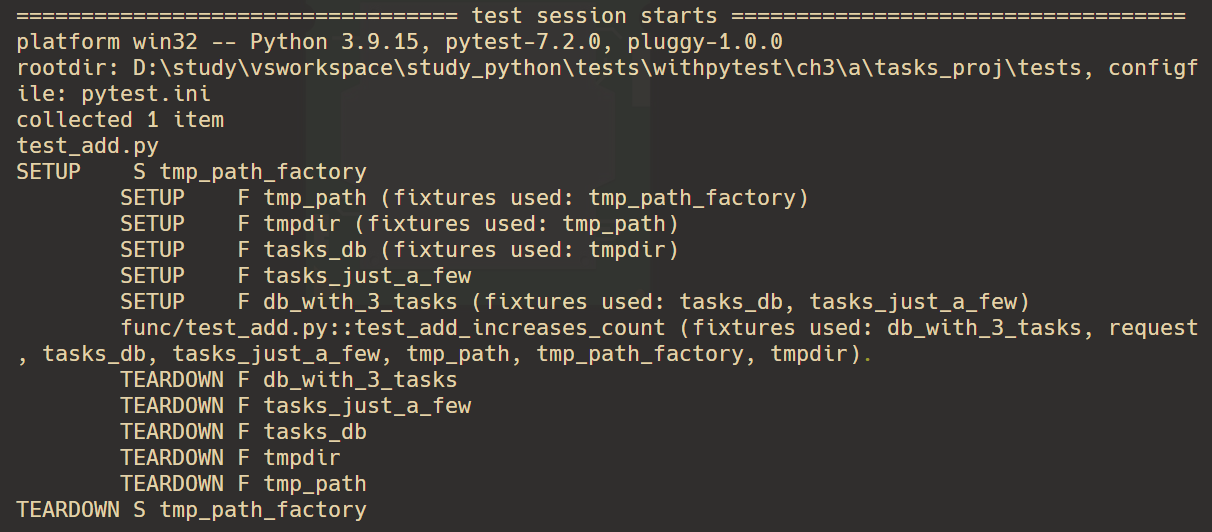

## 指定fixture的作用范围
@pytest.fixture(scope=),scope参数有四个待选值：function（默认）、class、module、session。

1. scope='function'

函数界别的fixture每个测试函数只需要执行一次。配置代码在测试用例运行之前运行，销毁代码在测试用例之后运行。

2. scope='class'

类级别的fixture每个测试类只需要运行一次，无论测试类里有多少个类方法都可以共享这个fixture。

3. scope='module'

模块级别的fixture每个模块只需要运行一次，无论模块里有多少个测试函数、类方法或其他fixture都可以共享这个fixture。

4. scope='session'

会话级别的fixture每次会话只需要运行一次，一次pytest会话中的所有测试函数、方法都可以共享这个fixture。

执行：pytest --setup-show test_scope.py



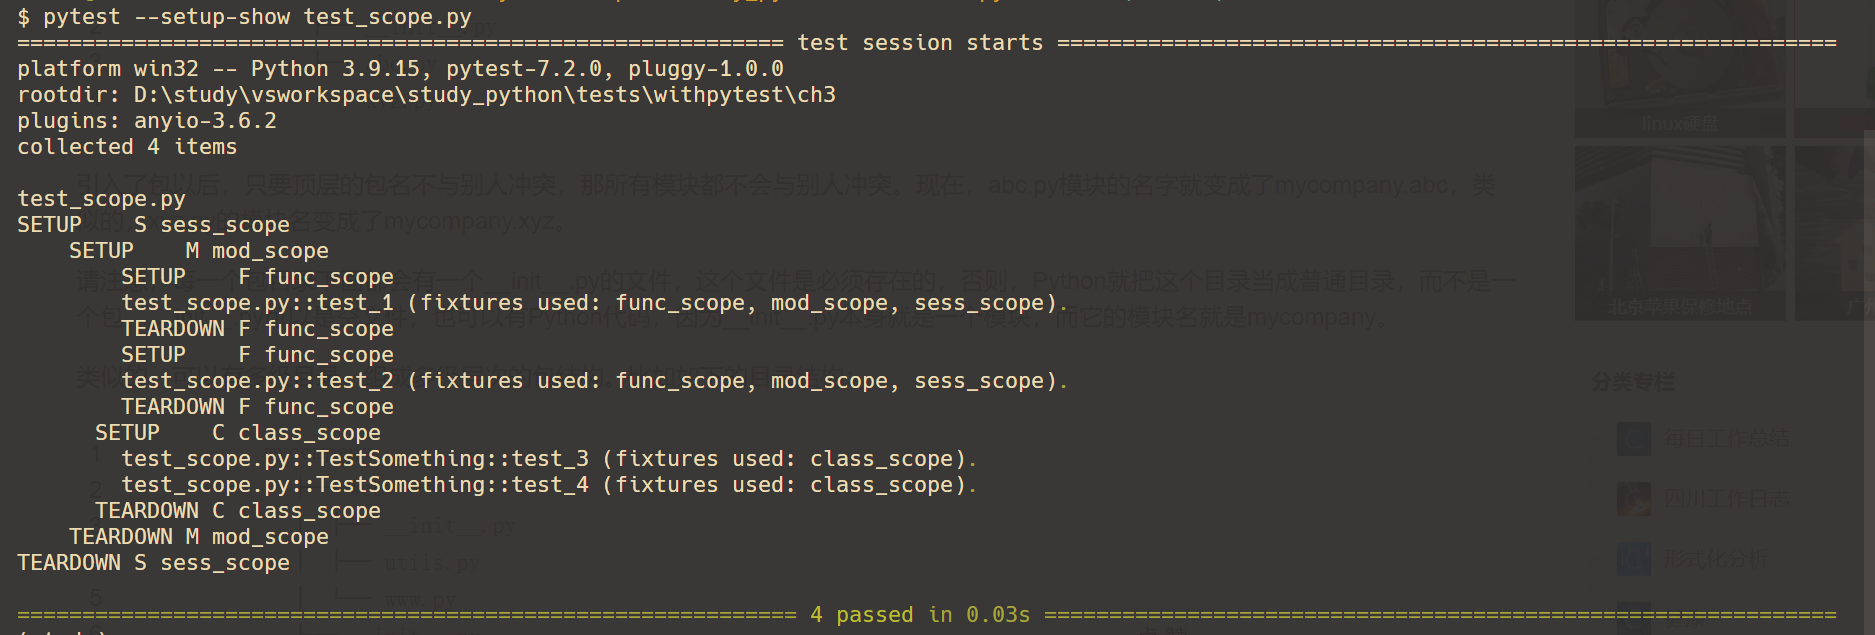

## 修改Tasks项目的fixture作用范围

cd b/tasks_proj/tests/conftest.py

tmpdir作用范围是函数级别，需要改成tmpdir_factory（是会话级别）。

再添加会话级别的数据库连接fixture
@pytest.fixture(scope='session')

再改动tasks_db，使其依赖于tasks_db_session，并执行所有条目的删除指令。

数据相关的fixture(例如：tasks_just_a_few)的作用只是返回值，没有必要一直运行，每次会话调用一次即可；
pytest --setup-show .\func\test_add.py

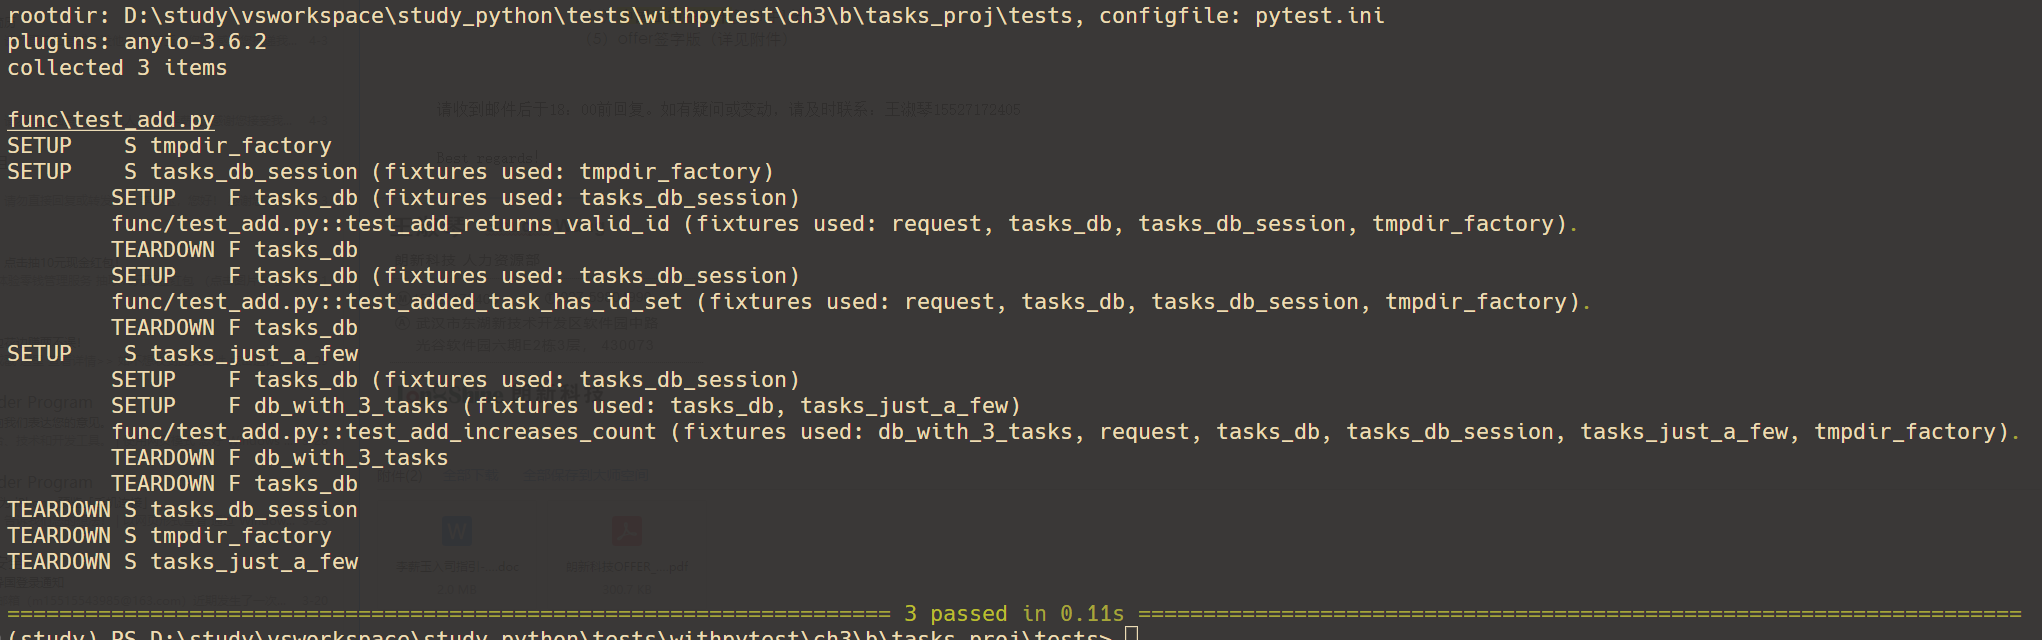